<a href="https://colab.research.google.com/github/kevin-r-murphy/BA888-MBTA/blob/main/MBTA_RapidTransit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np
trips = pd.read_csv('https://raw.githubusercontent.com/kevin-r-murphy/BA888-MBTA/main/trips.txt')
shapes = pd.read_csv('https://raw.githubusercontent.com/kevin-r-murphy/BA888-MBTA/main/shapes.txt')
stop_times = pd.read_csv('https://raw.githubusercontent.com/kevin-r-murphy/BA888-MBTA/main/stop_times.txt')
stops = pd.read_csv('https://raw.githubusercontent.com/kevin-r-murphy/BA888-MBTA/main/stops.txt')
route_patterns = pd.read_csv('https://raw.githubusercontent.com/kevin-r-murphy/BA888-MBTA/main/route_patterns.txt')
route = pd.read_csv('https://raw.githubusercontent.com/kevin-r-murphy/BA888-MBTA/main/routes.txt')
jan_headway = pd.read_csv('https://raw.githubusercontent.com/kevin-r-murphy/BA888-MBTA/main/2024-01_Headway.csv')
feb_headway = pd.read_csv('https://raw.githubusercontent.com/kevin-r-murphy/BA888-MBTA/main/2024-02_Headway.csv')
gated_entries = pd.read_csv('https://raw.githubusercontent.com/kevin-r-murphy/BA888-MBTA/main/MBTA_Gated_Station_Entries.csv')
headways = pd.concat([jan_headway, feb_headway])

<ipython-input-2-1523b102d7d4>:3: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  trips = pd.read_csv('https://raw.githubusercontent.com/kevin-r-murphy/BA888-MBTA/main/trips.txt')
<ipython-input-2-1523b102d7d4>:5: DtypeWarning: Columns (0,3,5) have mixed types. Specify dtype option on import or set low_memory=False.
  stop_times = pd.read_csv('https://raw.githubusercontent.com/kevin-r-murphy/BA888-MBTA/main/stop_times.txt')
<ipython-input-2-1523b102d7d4>:9: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  jan_headway = pd.read_csv('https://raw.githubusercontent.com/kevin-r-murphy/BA888-MBTA/main/2024-01_Headway.csv')
<ipython-input-2-1523b102d7d4>:10: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  feb_headway = pd.read_csv('https://raw.githubusercontent.com/kevin-r-murphy/BA888-MBTA/main/2024-02_Headway.csv')


In [3]:
trips['trip_route_type'].value_counts()

trip_route_type
3.0    4787
Name: count, dtype: int64

In [4]:
shapes.head()

,shape_id,shape_pt_lat,shape_pt_lon,shape_pt_sequence,shape_dist_traveled
0,010128,42.329848,-71.083876,10001,NaN
1,010128,42.329788,-71.083268,10002,NaN
2,010128,42.330089,-71.083198,10003,NaN
3,010128,42.330296,-71.083161,10004,NaN
4,010128,42.330493,-71.083112,10005,NaN


In [5]:
stop_times[stop_times['trip_id'] == 59428098] #Can't Convert arrival and departure into date time because hours are greater than 23

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,timepoint,checkpoint_id,continuous_pickup,continuous_drop_off
16,59428098,25:05:00,25:05:00,70261,1,NaN,0,1,0,asmnl,NaN,NaN
17,59428098,25:06:00,25:06:00,70263,2,NaN,0,0,0,cedgr,NaN,NaN
18,59428098,25:08:00,25:08:00,70265,3,NaN,0,0,0,butlr,NaN,NaN
19,59428098,25:09:00,25:09:00,70267,4,NaN,0,0,0,miltt,NaN,NaN
20,59428098,25:10:00,25:10:00,70269,5,NaN,0,0,0,cenav,NaN,NaN
21,59428098,25:11:00,25:11:00,70271,6,NaN,0,0,0,valrd,NaN,NaN
22,59428098,25:12:00,25:12:00,70273,7,NaN,0,0,0,capst,NaN,NaN
23,59428098,25:13:00,25:13:00,70275,8,NaN,1,0,0,matt,NaN,NaN


In [6]:
stop_times['stop_id'] = stop_times['stop_id'].astype(str)
stops['stop_id'] = stops['stop_id'].astype(str)
stop_times = stop_times.merge(stops, how = 'left', on = 'stop_id')

In [7]:
trips['route_id'] = trips['route_id'].astype(str)
trips['trip_id'] = trips['trip_id'].astype(str)
stop_times['trip_id'] = stop_times['trip_id'].astype(str)
trips = trips.merge(route[['route_id','route_desc', 'route_type']], how = 'left', on = 'route_id')

In [8]:
stop_times = stop_times.merge(trips[['trip_id','route_desc', 'route_type', 'route_id']], how = 'left', on = 'trip_id')

**Gate Entries & Headways**

In [9]:
headways.shape

(1619528, 14)

****Headway Analysis****

In [10]:
stop_times_RT = stop_times.merge(headways[['service_date','stop_departure_datetime', 'stop_departure_sec', 'headway_trunk_seconds','trip_id','stop_id', 'direction_id']], on = ['trip_id', 'stop_id'], how = 'left')
stop_times_RT['headway_mins'] = stop_times_RT['headway_trunk_seconds'] / 60
stop_times_RT.dropna(subset = ['headway_mins'],inplace = True)
stop_times_RT.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,timepoint,checkpoint_id,...,vehicle_type,route_desc,route_type,route_id,service_date,stop_departure_datetime,stop_departure_sec,headway_trunk_seconds,direction_id,headway_mins
40,59428097,05:18:00,05:18:00,70271,6,NaN,0,0,0,valrd,...,0.0,Rapid Transit,0,Mattapan,2024-01-13,2024-01-13T05:20:55Z,19255.0,1389.0,0.0,23.150000
46,59428097,05:19:00,05:19:00,70273,7,NaN,0,0,0,capst,...,0.0,Rapid Transit,0,Mattapan,2024-01-13,2024-01-13T05:22:19Z,19339.0,1383.0,0.0,23.050000
53,59428098,25:06:00,25:06:00,70263,2,NaN,0,0,0,cedgr,...,0.0,Rapid Transit,0,Mattapan,2024-01-06,2024-01-07T01:04:17Z,90257.0,917.0,0.0,15.283333
54,59428098,25:06:00,25:06:00,70263,2,NaN,0,0,0,cedgr,...,0.0,Rapid Transit,0,Mattapan,2024-01-13,2024-01-14T01:02:24Z,90144.0,759.0,0.0,12.650000
55,59428098,25:06:00,25:06:00,70263,2,NaN,0,0,0,cedgr,...,0.0,Rapid Transit,0,Mattapan,2024-01-20,2024-01-21T01:01:27Z,90087.0,880.0,0.0,14.666667


Text(0.5, 0, 'Route')

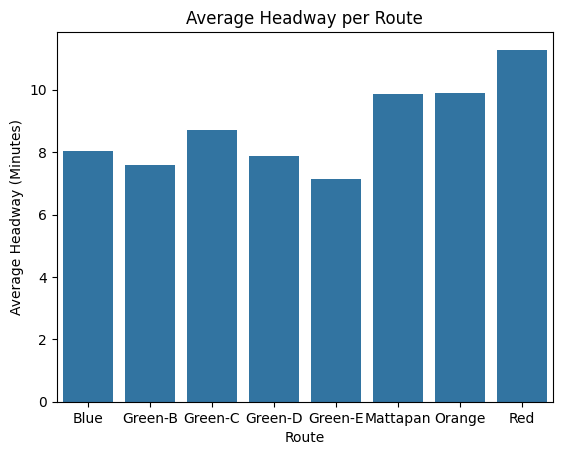

In [11]:
sns.barplot(stop_times_RT['headway_mins'].groupby(stop_times_RT['route_id']).mean())
plt.title('Average Headway per Route')
plt.ylabel('Average Headway (Minutes)')
plt.xlabel('Route')

Text(0.5, 0, 'Route')

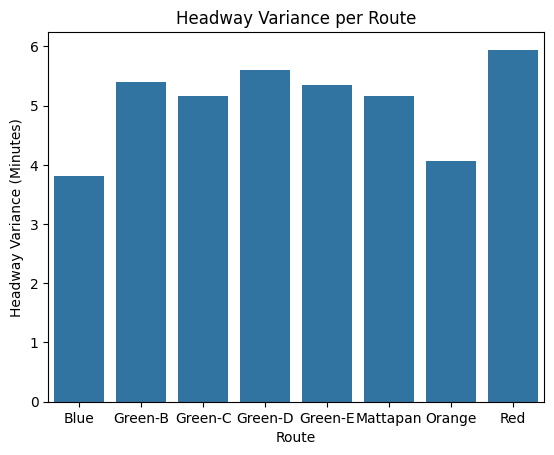

In [12]:
sns.barplot(stop_times_RT['headway_mins'].groupby(stop_times_RT['route_id']).std())
plt.title('Headway Variance per Route')
plt.ylabel('Headway Variance (Minutes)')
plt.xlabel('Route')

In [13]:
avg_station_headway = stop_times_RT.groupby(stop_times_RT['stop_id'])[['headway_mins', 'direction_id']].agg(['mean','min', 'max', 'std']).reset_index()
avg_station_headway.columns = ['_'.join(col).strip('_') for col in avg_station_headway.columns.values]
avg_station_headway['direction_id'] = avg_station_headway['direction_id_max'].astype(int).astype(str)

avg_station_headway.drop(['direction_id_max', 'direction_id_mean', 'direction_id_min', 'direction_id_std'], axis = 1, inplace = True)
avg_station_headway_named = avg_station_headway.merge(stops[['stop_id','stop_name', 'stop_lat', 'stop_lon']], on = 'stop_id', how = 'left')
avg_station_headway_named['name_direction'] = avg_station_headway_named['stop_name'] + ' ' + avg_station_headway_named['direction_id']
avg_station_headway_named['direction'] = avg_station_headway_named['direction_id'].apply(lambda x: 'Inbound' if x=='1' else 'Outbound')
avg_station_headway_named.head()

,stop_id,headway_mins_mean,headway_mins_min,headway_mins_max,headway_mins_std,direction_id,stop_name,stop_lat,stop_lon,name_direction,direction
0,170136,9.814924,0.050000,43.733333,4.307109,1,Babcock Street,42.351538,-71.119553,Babcock Street 1,Inbound
1,170137,9.402126,0.766667,36.633333,5.186438,0,Babcock Street,42.351695,-71.120257,Babcock Street 0,Outbound
2,170140,9.796750,0.066667,73.700000,4.690207,1,Amory Street,42.350901,-71.114318,Amory Street 1,Inbound
3,170141,9.409108,0.083333,35.450000,5.073821,0,Amory Street,42.351066,-71.115027,Amory Street 0,Outbound
4,70002,10.011886,1.200000,109.316667,4.999964,0,Green Street,42.309832,-71.108059,Green Street 0,Outbound


In [14]:
stops.head()

,stop_id,stop_code,stop_name,stop_desc,platform_code,platform_name,stop_lat,stop_lon,zone_id,stop_address,stop_url,level_id,location_type,parent_station,wheelchair_boarding,municipality,on_street,at_street,vehicle_type
0,1,1.0,Washington St opp Ruggles St,NaN,NaN,NaN,42.330957,-71.082754,ExpressBus-Downtown,NaN,https://www.mbta.com/stops/1,NaN,0,NaN,1,Boston,Washington Street,Ruggles Street,3.0
1,10,10.0,Theo Glynn Way @ Newmarket Sq,NaN,NaN,NaN,42.330555,-71.068787,LocalBus,NaN,https://www.mbta.com/stops/10,NaN,0,NaN,1,Boston,Theodore Glynn Way,Newmarket Square,3.0
2,10000,10000.0,Tremont St opp Temple Pl,NaN,NaN,NaN,42.355692,-71.062911,LocalBus,NaN,https://www.mbta.com/stops/10000,NaN,0,NaN,1,Boston,Tremont Street,Temple Place,3.0
3,10003,10003.0,Albany St opp Randall St,NaN,NaN,NaN,42.331591,-71.076237,LocalBus,NaN,https://www.mbta.com/stops/10003,NaN,0,NaN,1,Boston,Albany Street,Randall Street,3.0
4,10005,10005.0,Albany St opp E Concord St,NaN,NaN,NaN,42.335017,-71.071280,LocalBus,NaN,https://www.mbta.com/stops/10005,NaN,0,NaN,1,Boston,Albany Street,NaN,3.0


In [15]:
avg_station_headway_named.head()

,stop_id,headway_mins_mean,headway_mins_min,headway_mins_max,headway_mins_std,direction_id,stop_name,stop_lat,stop_lon,name_direction,direction
0,170136,9.814924,0.050000,43.733333,4.307109,1,Babcock Street,42.351538,-71.119553,Babcock Street 1,Inbound
1,170137,9.402126,0.766667,36.633333,5.186438,0,Babcock Street,42.351695,-71.120257,Babcock Street 0,Outbound
2,170140,9.796750,0.066667,73.700000,4.690207,1,Amory Street,42.350901,-71.114318,Amory Street 1,Inbound
3,170141,9.409108,0.083333,35.450000,5.073821,0,Amory Street,42.351066,-71.115027,Amory Street 0,Outbound
4,70002,10.011886,1.200000,109.316667,4.999964,0,Green Street,42.309832,-71.108059,Green Street 0,Outbound


Text(0, 0.5, 'Station (1 = Inbound)')

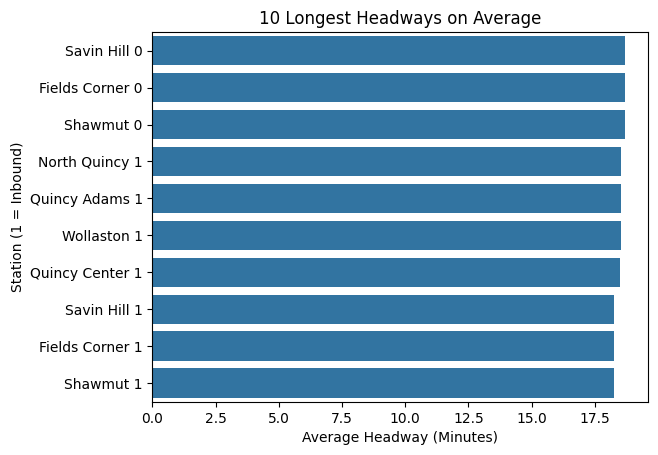

In [16]:
sns.barplot(data = avg_station_headway_named.sort_values(by = 'headway_mins_mean', ascending = False)[:10], y = 'name_direction', x = 'headway_mins_mean')
plt.title('10 Longest Headways on Average')
plt.xlabel('Average Headway (Minutes)')
plt.ylabel('Station (1 = Inbound)')

Text(0, 0.5, 'Station (1 = Inbound)')

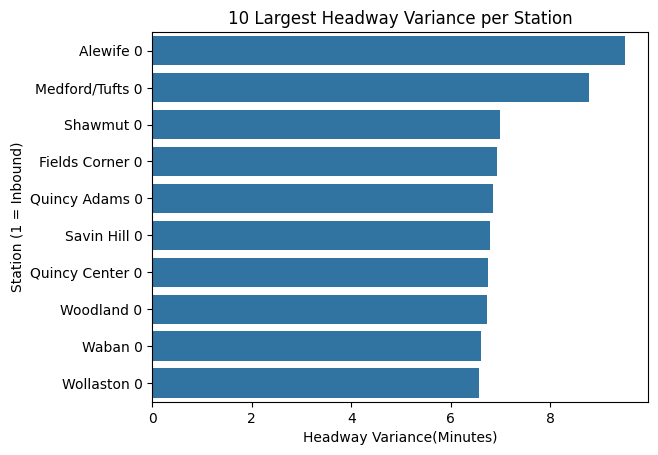

In [17]:
sns.barplot(data = avg_station_headway_named.sort_values(by = 'headway_mins_std', ascending = False)[:10], y = 'name_direction', x = 'headway_mins_std')
plt.title('10 Largest Headway Variance per Station')
plt.xlabel('Headway Variance(Minutes)')
plt.ylabel('Station (1 = Inbound)')

In [18]:
#Lat adjustment
avg_station_headway_named['stop_lat'] = np.where(avg_station_headway_named['direction_id'] == '1',
                                    avg_station_headway_named['stop_lat'] + 0.0005,
                                    avg_station_headway_named['stop_lat'] - 0.0005)

Direction_ID: 1 = Inbound, 0 = Outbound

In [19]:
import plotly.express as px
from plotly.offline import plot
px.set_mapbox_access_token('pk.eyJ1Ijoia2VtdTEiLCJhIjoiY2x5YWYzeDZtMTNwdzJybXhsMnhiOHFlcCJ9.ZlVG4dJl_SlRlFhYPmQdsw')
fig = px.scatter_mapbox(avg_station_headway_named, lat="stop_lat", lon="stop_lon",
                        color="direction", zoom=13,
                        size = 'headway_mins_mean',

                        #color_continuous_scale=px.colors.cyclical.Twilight,
                        #mapbox_style='open-street-map'
                        mapbox_style = 'basic',
                        title = 'Average Headway per Station',
                        labels = {'headway_mins_mean':'Average Headway (Minutes)',
                                  'direction': 'Direction'
                                  },
                        center = {'lat': 42.342507, 'lon': -71.118699},
                        width = 1000,
                        height = 800
                        )
fig.update_layout(
    title_x=0.5,
    title_y=0.9,
    title_font_size=24,
    legend_x = 0.05,
    legend_y = 0.95
)
fig.write_html('headway_mean_map.html')
fig.show()

In [20]:
fig = px.scatter_mapbox(avg_station_headway_named, lat="stop_lat", lon="stop_lon",
                        color="direction", zoom=13,
                        size = 'headway_mins_std',
                        #color_continuous_scale=px.colors.cyclical.Twilight,
                        #mapbox_style='open-street-map'
                        mapbox_style = 'basic',
                        title = 'Station Headway Variance',
                        labels = {'headway_mins_std':'Headway Variance (Minutes)',
                                  'direction': 'Direction'},
                        center = {'lat': 42.342507, 'lon': -71.118699},
                        width = 1000,
                        height = 800,
                        hover_data = ['direction_id', 'stop_name', 'stop_id']

                        )
fig.update_layout(
    title_x=0.5,
    title_y=0.9,
    title_font_size=24,
    legend_x = 0.05,
    legend_y = 0.95
)
fig.write_html('headway_std_map.html')
fig.show()

****Variance in Journey Length****

In [21]:
journey_length = stop_times_RT.sort_values(by = ['service_date', 'stop_sequence','trip_id'], ascending=[True, True, True])
journey_length['prev_sec'] = journey_length.groupby(['trip_id', 'service_date'])['stop_departure_sec'].shift(1)
journey_length['prev_station'] = journey_length.groupby(['trip_id', 'service_date'])['stop_name'].shift(1)
journey_length['prev_stop_seq'] = journey_length.groupby(['trip_id', 'service_date'])['stop_sequence'].shift(1)
journey_length['is_consecutive'] = journey_length.apply(lambda x: True if pd.isna(x['prev_stop_seq']) else  (((x['stop_sequence'] - x['prev_stop_seq']) ==1) or(x['stop_sequence'] - x['prev_stop_seq']) ==10), axis = 1)
journey_length['journey_length'] = (journey_length['stop_departure_sec'] - journey_length['prev_sec']) / 60
journey_length['journey_name'] = journey_length['prev_station'] + ' to ' + journey_length['stop_name']
journey_length = journey_length[journey_length['is_consecutive'] == True] #Only Consecutive Stations Toggle
journey_length_chart = journey_length.groupby('journey_name')['journey_length'].agg(['mean', 'std', 'count']).reset_index()
journey_length_chart = journey_length_chart[journey_length_chart['count'] > 100]

Text(0, 0.5, 'Event (Minimum 100 Events)')

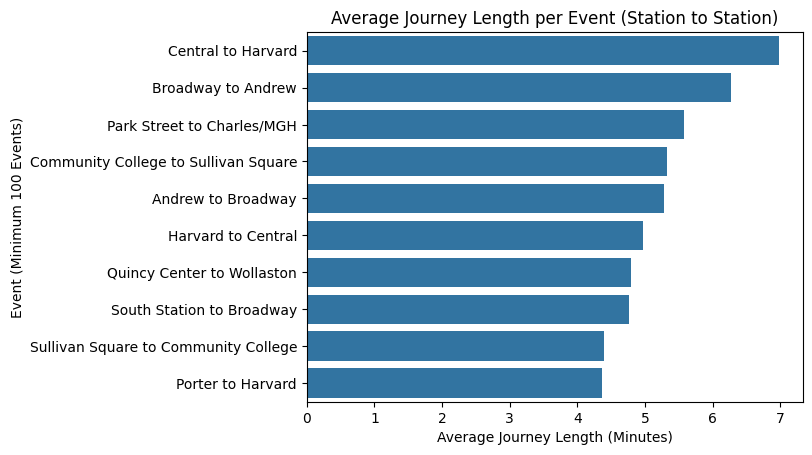

In [22]:
sns.barplot(data = journey_length_chart.sort_values(by = 'mean', ascending = False).head(10),y = 'journey_name', x = 'mean', orient = 'h')
plt.title('Average Journey Length per Event (Station to Station)')
plt.xlabel('Average Journey Length (Minutes)')
plt.ylabel('Event (Minimum 100 Events)')

Text(0, 0.5, 'Event (Minimum 100 Events)')

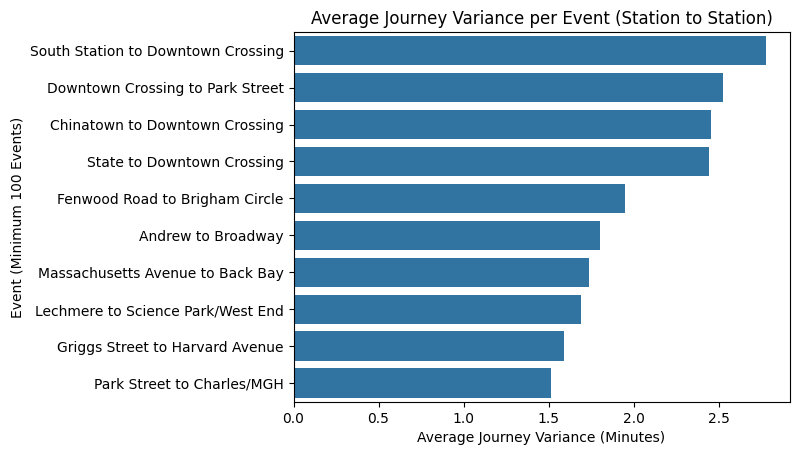

In [23]:
sns.barplot(data = journey_length_chart.sort_values(by = 'std', ascending = False).head(10),y = 'journey_name', x = 'std', orient = 'h')
plt.title('Average Journey Variance per Event (Station to Station)')
plt.xlabel('Average Journey Variance (Minutes)')
plt.ylabel('Event (Minimum 100 Events)')

In [24]:
journey_length[(journey_length['trip_id'] == '59736517') & (journey_length['service_date'] == '2024-01-03')]


,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,timepoint,checkpoint_id,...,stop_departure_sec,headway_trunk_seconds,direction_id,headway_mins,prev_sec,prev_station,prev_stop_seq,is_consecutive,journey_length,journey_name
131651,59736517,05:53:00,05:53:00,70042,20,NaN,0,0,0,state,...,21224.0,272.0,1.0,4.533333,NaN,NaN,NaN,True,NaN,NaN
131678,59736517,05:55:00,05:55:00,70044,30,NaN,0,0,0,aqucl,...,21326.0,287.0,1.0,4.783333,21224.0,State,20.0,True,1.700000,State to Aquarium
131705,59736517,05:58:00,05:58:00,70046,40,NaN,0,0,0,mvbcl,...,21495.0,282.0,1.0,4.700000,21326.0,Aquarium,30.0,True,2.816667,Aquarium to Maverick
131732,59736517,06:01:00,06:01:00,70048,50,NaN,0,0,0,aport,...,21644.0,295.0,1.0,4.916667,21495.0,Maverick,40.0,True,2.483333,Maverick to Airport
131787,59736517,06:09:00,06:09:00,70054,80,NaN,0,0,0,sdmnl,...,22120.0,373.0,1.0,6.216667,21986.0,Orient Heights,70.0,True,2.233333,Orient Heights to Suffolk Downs
131814,59736517,06:11:00,06:11:00,70056,90,NaN,0,0,0,bmmnl,...,22201.0,370.0,1.0,6.166667,22120.0,Suffolk Downs,80.0,True,1.350000,Suffolk Downs to Beachmont
131841,59736517,06:13:00,06:13:00,70058,100,NaN,0,0,0,rbmnl,...,22343.0,380.0,1.0,6.333333,22201.0,Beachmont,90.0,True,2.366667,Beachmont to Revere Beach


In [25]:
headways[(headways['trip_id'] == '59736517') & (headways['service_date'] == '2024-01-03')]

,service_date,route_id,trunk_route_id,branch_route_id,trip_id,direction_id,direction,parent_station,stop_id,stop_name,stop_departure_datetime,stop_departure_sec,headway_trunk_seconds,headway_branch_seconds
65236,2024-01-03,Blue,Blue,NaN,59736517,1,East,place-gover,70040,Government Center,2024-01-03T05:52:14Z,21134,283.0,NaN
65570,2024-01-03,Blue,Blue,NaN,59736517,1,East,place-state,70042,State,2024-01-03T05:53:44Z,21224,272.0,NaN
65904,2024-01-03,Blue,Blue,NaN,59736517,1,East,place-aqucl,70044,Aquarium,2024-01-03T05:55:26Z,21326,287.0,NaN
66238,2024-01-03,Blue,Blue,NaN,59736517,1,East,place-mvbcl,70046,Maverick,2024-01-03T05:58:15Z,21495,282.0,NaN
66572,2024-01-03,Blue,Blue,NaN,59736517,1,East,place-aport,70048,Airport,2024-01-03T06:00:44Z,21644,295.0,NaN
67072,2024-01-03,Blue,Blue,NaN,59736517,1,East,place-orhte,70052,Orient Heights,2024-01-03T06:06:26Z,21986,340.0,NaN
67400,2024-01-03,Blue,Blue,NaN,59736517,1,East,place-sdmnl,70054,Suffolk Downs,2024-01-03T06:08:40Z,22120,373.0,NaN
67728,2024-01-03,Blue,Blue,NaN,59736517,1,East,place-bmmnl,70056,Beachmont,2024-01-03T06:10:01Z,22201,370.0,NaN
68056,2024-01-03,Blue,Blue,NaN,59736517,1,East,place-rbmnl,70058,Revere Beach,2024-01-03T06:12:23Z,22343,380.0,NaN


**Gated Entries**

In [26]:
gated_entries.shape

(344060, 7)

In [27]:
print(gated_entries.head())

             service_date time_period      stop_id     station_name  \
0  2024/02/29 05:00:00+00  (00:00:00)  place-welln       Wellington   
1  2024/02/29 05:00:00+00  (00:00:00)  place-wimnl      Wood Island   
2  2024/02/29 05:00:00+00  (00:30:00)   place-sull  Sullivan Square   
3  2024/02/29 05:00:00+00  (00:00:00)  place-wondl       Wonderland   
4  2024/02/29 05:00:00+00  (00:00:00)  place-asmnl          Ashmont   

  route_or_line  gated_entries  ObjectId  
0   Orange Line            2.0    275252  
1     Blue Line            5.0    275262  
2   Orange Line            2.0    275265  
3     Blue Line           12.0    275266  
4      Red Line            6.0    275271  


In [28]:
gated_entries['ObjectId'].value_counts()

ObjectId
275252    1
504826    1
504824    1
504823    1
504822    1
         ..
390131    1
390130    1
390129    1
390128    1
619567    1
Name: count, Length: 344060, dtype: int64

In [29]:
gated_entries['service_date'] = pd.to_datetime(gated_entries['service_date'])
gated_entries['hour'] = gated_entries['time_period'].str.extract(r'\((\d+):').astype(int)
gated_entries['date'] = gated_entries['service_date'].dt.date
print(gated_entries.isnull().sum())

service_date         0
time_period          0
stop_id          11725
station_name         0
route_or_line        0
gated_entries        0
ObjectId             0
hour                 0
date                 0
dtype: int64


In [30]:
gated_entries.dropna(inplace=True)
entries_per_hour = gated_entries.groupby(['station_name', 'hour']).size().reset_index(name='entries')
print(entries_per_hour.head())

  station_name  hour  entries
0      Airport     0      239
1      Airport     1      192
2      Airport     2       12
3      Airport     3        9
4      Airport     4      105


In [31]:
peak_hours = entries_per_hour.groupby('hour')['entries'].sum().reset_index()
high_traffic_stations = entries_per_hour.groupby('station_name')['entries'].sum().reset_index().sort_values(by='entries', ascending=False)

<ipython-input-32-015d481f2e0e>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




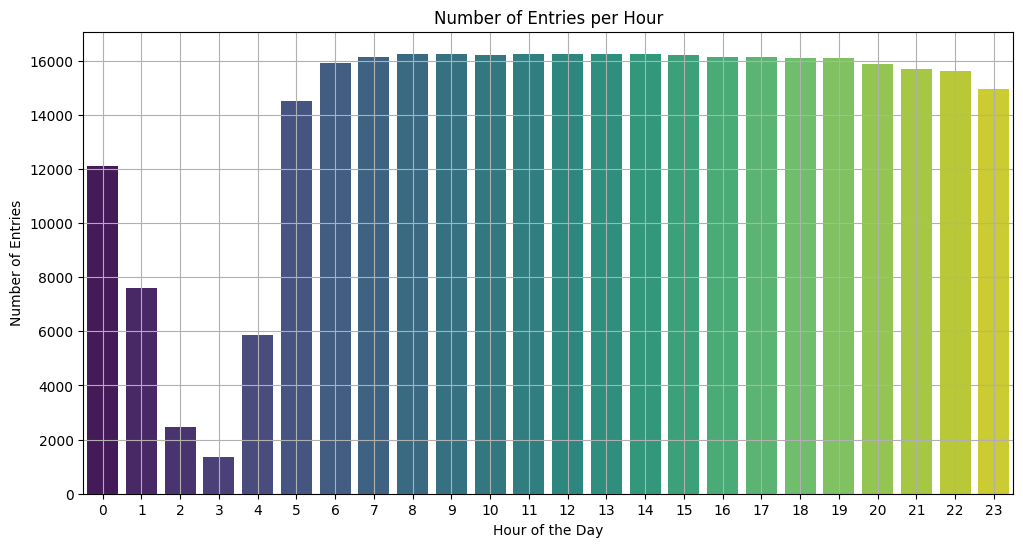

In [32]:
plt.figure(figsize=(12, 6))
sns.barplot(x='hour', y='entries', data=peak_hours, palette='viridis')
plt.title('Number of Entries per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Entries')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

<ipython-input-33-e5f52d3fe76c>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




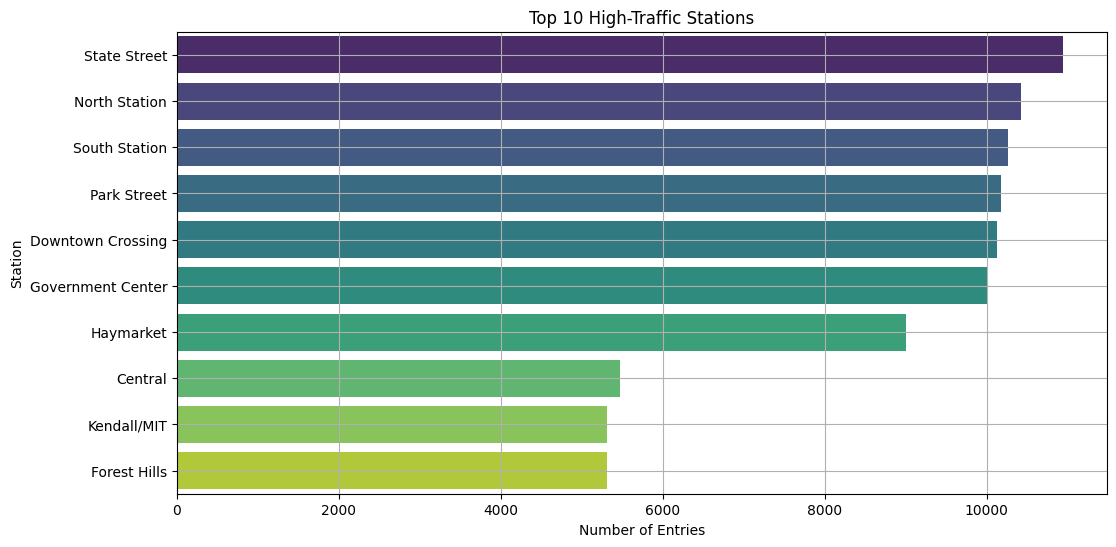

In [33]:
plt.figure(figsize=(12, 6))
sns.barplot(x='entries', y='station_name', data=high_traffic_stations.head(10), palette='viridis')
plt.title('Top 10 High-Traffic Stations')
plt.xlabel('Number of Entries')
plt.ylabel('Station')
plt.grid(True)
plt.show()

****Gated Entries & Headways Combined****

In [34]:
gated_entries['service_date'] = gated_entries['service_date'].astype(str)
gated_entries['service_date'] = gated_entries['service_date'].astype(str)
gated_entries['date_round'] = gated_entries['service_date'].apply(lambda x: x.split(' ')[0])

In [35]:
stop_times_RT['service_date'] = stop_times_RT['stop_departure_datetime'].apply(lambda x: x.split('T')[0])
stop_times_RT['service_time'] = stop_times_RT['stop_departure_datetime'].apply(lambda x: x.split('T')[1].replace('Z',''))
stop_times_RT['service_time'] = pd.to_datetime(stop_times_RT['service_time'], format = "%H:%M:%S")
stop_times_RT['round_time'] = stop_times_RT['service_time'].apply(lambda x: (x-dt.timedelta(minutes=x.minute%15, seconds=x.second, microseconds=x.microsecond)).time())
stop_times_RT['time_period'] = ('(' + stop_times_RT['round_time'].astype(str) + ')')


In [36]:
gated_entries['date'] = gated_entries['service_date'].astype(str)
gated_entries['time_period'] = gated_entries['time_period'].astype(str)
stop_times_RT['time_period'] = stop_times_RT['time_period'].astype(str)
stop_times_RT['service_date'] = stop_times_RT['service_date'].astype(str)
headway_gated = stop_times_RT.merge(gated_entries[['date_round', 'time_period','station_name', 'gated_entries']], left_on = ['service_date', 'time_period', 'stop_name'],right_on =['date_round', 'time_period', 'station_name'],  how = 'inner')
headway_gated

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,timepoint,checkpoint_id,...,stop_departure_sec,headway_trunk_seconds,direction_id,headway_mins,service_time,round_time,time_period,date_round,station_name,gated_entries
0,59668897,06:14:00,06:14:00,70034,10,NaN,0,0,0,mlmnl,...,22616.0,721.0,0.0,12.016667,1900-01-01 06:16:56,06:15:00,(06:15:00),2024-01-07,Malden Center,19.00
1,59668898,06:27:00,06:27:00,70034,10,NaN,0,0,0,mlmnl,...,23387.0,771.0,0.0,12.850000,1900-01-01 06:29:47,06:15:00,(06:15:00),2024-01-07,Malden Center,19.00
2,59668897,06:14:00,06:14:00,70034,10,NaN,0,0,0,mlmnl,...,22599.0,780.0,0.0,13.000000,1900-01-01 06:16:39,06:15:00,(06:15:00),2024-01-14,Malden Center,27.00
3,59668898,06:27:00,06:27:00,70034,10,NaN,0,0,0,mlmnl,...,23358.0,759.0,0.0,12.650000,1900-01-01 06:29:18,06:15:00,(06:15:00),2024-01-14,Malden Center,27.00
4,59668897,06:14:00,06:14:00,70034,10,NaN,0,0,0,mlmnl,...,22644.0,810.0,0.0,13.500000,1900-01-01 06:17:24,06:15:00,(06:15:00),2024-01-21,Malden Center,26.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327066,60572445,24:56:00,24:56:00,70154,570,NaN,0,0,0,coecl,...,90354.0,1016.0,1.0,16.933333,1900-01-01 01:05:54,01:00:00,(01:00:00),2024-02-04,Copley,2.00
327067,60572444,25:10:00,25:10:00,70158,590,NaN,0,0,1,boyls,...,90637.0,62.0,1.0,1.033333,1900-01-01 01:10:37,01:00:00,(01:00:00),2024-02-04,Boylston,5.00
327068,60572445,25:00:00,25:00:00,70158,590,NaN,0,0,0,boyls,...,90575.0,81.0,1.0,1.350000,1900-01-01 01:09:35,01:00:00,(01:00:00),2024-02-04,Boylston,5.00
327069,60574377,05:36:00,05:36:00,70204,30,NaN,0,0,0,haecl,...,19945.0,247.0,0.0,4.116667,1900-01-01 05:32:25,05:30:00,(05:30:00),2024-01-13,Haymarket,7.35


In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
headway_gated['eval_metric'] = scaler.fit_transform(headway_gated[['gated_entries']]) * scaler.fit_transform(headway_gated[['headway_mins']])

In [38]:
headway_gated[['trip_id','stop_id','date_round', 'round_time', 'stop_name','direction_id', 'route_id', 'headway_mins', 'gated_entries', 'eval_metric']].sort_values(by = 'eval_metric', ascending = False).head(15)

,trip_id,stop_id,date_round,round_time,stop_name,direction_id,route_id,headway_mins,gated_entries,eval_metric
152163,60392458,70072,2024-02-28,17:00:00,Kendall/MIT,1.0,Red,16.133333,1064.00,0.115977
283271,60565075,70206,2024-02-07,21:30:00,North Station,0.0,Green-D,12.433333,1296.24,0.108854
283255,60455472,70026,2024-02-07,21:30:00,North Station,0.0,Orange,12.050000,1296.24,0.105494
285187,60565074,70205,2024-02-01,22:00:00,North Station,1.0,Green-E,15.816667,957.00,0.102264
325901,60572220,70205,2024-02-19,16:00:00,North Station,1.0,Green-E,17.766667,799.92,0.096029
283259,60455597,70027,2024-02-07,21:30:00,North Station,1.0,Orange,10.816667,1296.24,0.094681
12504,59668960,70026,2024-02-04,20:00:00,North Station,0.0,Orange,12.816667,1034.88,0.089589
177852,60455563,70021,2024-01-24,17:00:00,Downtown Crossing,1.0,Orange,35.883333,368.22,0.089321
262757,60455436,70010,2024-01-24,17:00:00,Ruggles,0.0,Orange,42.316667,306.00,0.087542
283273,60455472,70026,2024-02-08,21:30:00,North Station,0.0,Orange,11.750000,1102.86,0.087518


In [39]:
demand_per_direction = headway_gated.groupby('direction_id')['gated_entries'].sum().reset_index()
demand_per_direction.columns = ['Direction', 'Total Gated Entries']
print(demand_per_direction)

   Direction  Total Gated Entries
0        0.0         1.022170e+07
1        1.0         9.399130e+06


<ipython-input-40-247a51fd839b>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




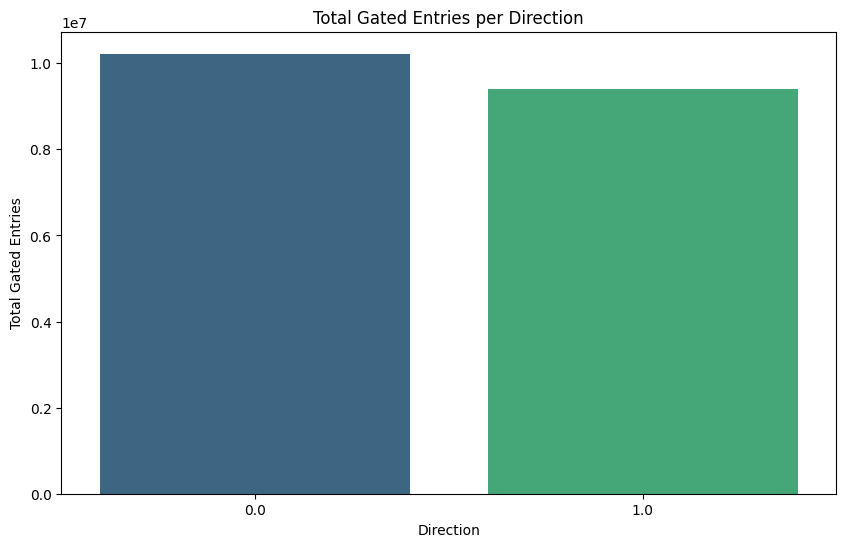

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=demand_per_direction, x='Direction', y='Total Gated Entries', palette='viridis')
plt.title('Total Gated Entries per Direction')
plt.xlabel('Direction')
plt.ylabel('Total Gated Entries')
plt.show()

****Green-C Analysis****

In [41]:
trips.head()

,route_id,service_id,trip_id,trip_headsign,trip_short_name,direction_id,block_id,shape_id,wheelchair_accessible,trip_route_type,route_pattern_id,bikes_allowed,route_desc,route_type
0,1,BUS12024-hbc14011-Weekday-02,60168424,Harvard,NaN,0,C01-1,010128,1,NaN,1-_-0,1,Key Bus,3
1,1,BUS12024-hbc14011-Weekday-02,60168429,Harvard,NaN,0,C01-4,010128,1,NaN,1-_-0,1,Key Bus,3
2,1,BUS12024-hbc14011-Weekday-02,60168432,Harvard,NaN,0,C01-7,010128,1,NaN,1-_-0,1,Key Bus,3
3,1,BUS12024-hbc14011-Weekday-02,60168435,Harvard,NaN,0,C01-9,010128,1,NaN,1-_-0,1,Key Bus,3
4,1,BUS12024-hbc14011-Weekday-02,60168437,Harvard,NaN,0,C01-1,010128,1,NaN,1-_-0,1,Key Bus,3


In [42]:
trips_green_c = trips[trips['route_id'] == 'Green-C']
trips_green_c.head()

,route_id,service_id,trip_id,trip_headsign,trip_short_name,direction_id,block_id,shape_id,wheelchair_accessible,trip_route_type,route_pattern_id,bikes_allowed,route_desc,route_type
65753,Green-C,LRV12024-hlb14011-Weekday-55,60564105,Cleveland Circle,NaN,0,B800-15,8000006,1,NaN,Green-C-832-0,2,Rapid Transit,0
65754,Green-C,LRV12024-hlb14011-Weekday-55,60564108,Cleveland Circle,NaN,0,B800-16,8000006,1,NaN,Green-C-832-0,2,Rapid Transit,0
65755,Green-C,LRV12024-hlb14011-Weekday-55,60564109,Cleveland Circle,NaN,0,B800-16,8000006,1,NaN,Green-C-832-0,2,Rapid Transit,0
65756,Green-C,LRV12024-hlb14011-Weekday-55,60564114,Cleveland Circle,NaN,0,B800-18,8000006,1,NaN,Green-C-832-0,2,Rapid Transit,0
65757,Green-C,LRV12024-hlb14011-Weekday-55,60564115,Cleveland Circle,NaN,0,B800-20,8000006,1,NaN,Green-C-832-0,2,Rapid Transit,0


In [43]:
stop_times_green_c = stop_times_RT[stop_times_RT['trip_id'].isin(trips_green_c['trip_id'])]
stop_times_green_c.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,timepoint,checkpoint_id,...,route_id,service_date,stop_departure_datetime,stop_departure_sec,headway_trunk_seconds,direction_id,headway_mins,service_time,round_time,time_period
255707,59952528,06:03:00,06:03:00,70197,70,NaN,0,0,0,pktrm,...,Green-C,2024-02-04,2024-02-04T06:08:17Z,22097.0,155.0,0.0,2.583333,1900-01-01 06:08:17,06:00:00,(06:00:00)
255708,59952528,06:05:00,06:05:00,70159,90,NaN,0,0,0,boyls,...,Green-C,2024-02-04,2024-02-04T06:09:38Z,22178.0,152.0,0.0,2.533333,1900-01-01 06:09:38,06:00:00,(06:00:00)
255709,59952528,06:07:00,06:07:00,70157,100,NaN,0,0,0,armnl,...,Green-C,2024-02-04,2024-02-04T06:11:46Z,22306.0,140.0,0.0,2.333333,1900-01-01 06:11:46,06:00:00,(06:00:00)
255710,59952528,06:09:00,06:09:00,70155,110,NaN,0,0,0,coecl,...,Green-C,2024-02-04,2024-02-04T06:14:02Z,22442.0,181.0,0.0,3.016667,1900-01-01 06:14:02,06:00:00,(06:00:00)
255711,59952528,06:12:00,06:12:00,70153,120,NaN,0,0,0,hymnl,...,Green-C,2024-02-04,2024-02-04T06:16:56Z,22616.0,386.0,0.0,6.433333,1900-01-01 06:16:56,06:15:00,(06:15:00)


In [44]:
fig = px.scatter_mapbox(avg_station_headway_named[avg_station_headway_named['stop_id'].isin(stop_times_green_c['stop_id'])], lat="stop_lat", lon="stop_lon",
                        color="direction", zoom=12,
                        size = 'headway_mins_std',
                        #color_continuous_scale=px.colors.cyclical.Twilight,
                        #mapbox_style='open-street-map'
                        mapbox_style = 'basic',
                        title = 'Green-C Station Headway Variance',
                        labels = {'headway_mins_std':'Headway Variance (Minutes)',
                                  'direction': 'Direction'},
                        center = {'lat': 42.366196, 'lon': -71.099637},
                        width = 1000,
                        height = 800,
                        hover_data = ['direction_id', 'stop_name', 'stop_id']

                        )
fig.update_layout(
    title_x=0.5,
    title_y=0.9,
    title_font_size=24,
    legend_x = 0.05,
    legend_y = 0.95
)
fig.write_html('headway_std_map.html')
fig.show()

In [45]:
stop_times_green_c_sched = stop_times[stop_times['trip_id'].isin(trips_green_c['trip_id'])]
stop_times_green_c_sched = stop_times_green_c_sched.merge(trips[['trip_id','direction_id']], how = 'left', on = 'trip_id')
stop_times_green_c_sched = stop_times_green_c_sched.sort_values(by = ['trip_id', 'departure_time'])[['route_id','trip_id', 'stop_id', 'stop_name', 'direction_id', 'departure_time']]
stop_times_green_c_sched['prev_stop'] = stop_times_green_c_sched.groupby('trip_id')['stop_name'].shift(1)
stop_times_green_c_sched[stop_times_green_c_sched['prev_stop'].isna()]['stop_name'].value_counts()

stop_name
Cleveland Circle     1264
Kenmore               688
Government Center     571
Medford/Tufts          11
North Station           6
Name: count, dtype: int64

In [46]:
#70202 Government Center
#70238 Clevland Circle
stop_times_green_c_sched = stop_times_green_c_sched[stop_times_green_c_sched['prev_stop'].isna()][['route_id','trip_id','stop_id', 'stop_name', 'departure_time', 'direction_id']]
stop_times_green_c_sched.sort_values(by = ['direction_id', 'departure_time'], inplace = True)
stop_times_green_c_sched['departure_time'] = stop_times_green_c_sched['departure_time'].apply(lambda x: x if int(x.split(':')[0]) < 24 else str(int(x.split(':')[0])-24).zfill(2) + ':' + x.split(':')[1] + ':00')
stop_times_green_c_sched = stop_times_green_c_sched[~stop_times_green_c_sched['trip_id'].isin(['canonical-Green-C-C1-0', 'canonical-Green-C-C1-1'])]
stop_times_green_c_sched['time_diff'] = (pd.to_datetime(stop_times_green_c_sched['departure_time'], format="%H:%M:%S") - pd.to_datetime(stop_times_green_c_sched.groupby(['stop_name','direction_id'])['departure_time'].shift(1),format = "%H:%M:%S")).dt.seconds/60
stop_times_green_c_sched.dropna(inplace = True)
stop_times_green_c_sched.groupby(['direction_id', 'stop_name'])['time_diff'].agg(['mean', 'std', 'min', 'max', 'count']).reset_index()

,direction_id,stop_name,mean,std,min,max,count
0,0,Government Center,2.202109,2.785070,0.0,14.0,569
1,0,Kenmore,1.705968,2.522957,0.0,14.0,687
2,0,Medford/Tufts,2.700000,5.735852,0.0,15.0,10
3,1,Cleveland Circle,0.992076,2.196876,0.0,12.0,1262
4,1,North Station,5.400000,7.797435,0.0,17.0,5


In [47]:
stop_times_green_c.columns

Index(['trip_id', 'arrival_time', 'departure_time', 'stop_id', 'stop_sequence',
       'stop_headsign', 'pickup_type', 'drop_off_type', 'timepoint',
       'checkpoint_id', 'continuous_pickup', 'continuous_drop_off',
       'stop_code', 'stop_name', 'stop_desc', 'platform_code', 'platform_name',
       'stop_lat', 'stop_lon', 'zone_id', 'stop_address', 'stop_url',
       'level_id', 'location_type', 'parent_station', 'wheelchair_boarding',
       'municipality', 'on_street', 'at_street', 'vehicle_type', 'route_desc',
       'route_type', 'route_id', 'service_date', 'stop_departure_datetime',
       'stop_departure_sec', 'headway_trunk_seconds', 'direction_id',
       'headway_mins', 'service_time', 'round_time', 'time_period'],
      dtype='object')

In [48]:
stop_times_green_c = stop_times_green_c[['trip_id','stop_id','stop_name', 'direction_id','service_date', 'departure_time', 'service_time', 'headway_mins']]
stop_times_green_c['service_time'] = stop_times_green_c['service_time'].dt.time

<ipython-input-48-d1563755a581>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [49]:
stop_times_green_c.sort_values(by = ['trip_id','service_date', 'departure_time'], inplace = True)
stop_times_green_c['prev_stop'] = stop_times_green_c.groupby(['trip_id', 'service_date'])['stop_name'].shift(1)
stop_times_green_c.head()

<ipython-input-49-c8a7909f17e9>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-49-c8a7909f17e9>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,trip_id,stop_id,stop_name,direction_id,service_date,departure_time,service_time,headway_mins,prev_stop
255707,59952528,70197,Park Street,0.0,2024-02-04,06:03:00,06:08:17,2.583333,NaN
255708,59952528,70159,Boylston,0.0,2024-02-04,06:05:00,06:09:38,2.533333,Park Street
255709,59952528,70157,Arlington,0.0,2024-02-04,06:07:00,06:11:46,2.333333,Boylston
255710,59952528,70155,Copley,0.0,2024-02-04,06:09:00,06:14:02,3.016667,Arlington
255711,59952528,70153,Hynes Convention Center,0.0,2024-02-04,06:12:00,06:16:56,6.433333,Copley


In [50]:

green_c_comp = stop_times_green_c[stop_times_green_c['stop_id'].isin(['70151','70234'])]
green_c_comp = green_c_comp[green_c_comp['service_time'] > pd.to_datetime('03:00:00').time()]
green_c_comp.sort_values(by = ['stop_name','service_date', 'service_time'], inplace = True)
green_c_comp['actual_time_diff'] = (pd.to_datetime(green_c_comp['service_time'], format="%H:%M:%S") - pd.to_datetime(green_c_comp.groupby(['stop_name','direction_id','service_date'])['service_time'].shift(1),format = "%H:%M:%S")).dt.seconds/60
green_c_comp_out = green_c_comp.groupby(['direction_id', 'stop_name'])['actual_time_diff'].agg(['mean', 'median','std', 'min', 'max', 'count']).reset_index()
green_c_comp_out = green_c_comp_out[green_c_comp_out['count'] > 100]
green_c_comp_out.head()

,direction_id,stop_name,mean,median,std,min,max,count
0,0.0,Kenmore,12.009311,10.533333,7.247095,0.716667,92.733333,2003
1,1.0,Dean Road,13.940699,11.200000,7.853083,1.750000,81.466667,1851


**Finding stops that create variance**

In [51]:
stop_times_green_c.sort_values(by = ['direction_id','stop_id','service_date', 'departure_time'], inplace = True)
stop_times_green_c['departure_time'] = stop_times_green_c['departure_time'].apply(lambda x: x if int(x.split(':')[0]) < 24 else str(int(x.split(':')[0])-24).zfill(2) + ':' + x.split(':')[1] + ':00')
stop_times_green_c['sched_diff'] = (pd.to_datetime(stop_times_green_c['departure_time'], format="%H:%M:%S") - pd.to_datetime(stop_times_green_c.groupby(['direction_id','stop_id','service_date'])['departure_time'].shift(1),format = "%H:%M:%S")).dt.seconds/60
stop_times_green_c.sort_values(by = ['direction_id','stop_id','service_date', 'service_time'], inplace = True)
stop_times_green_c['actual_diff'] = (pd.to_datetime(stop_times_green_c['service_time'], format="%H:%M:%S") - pd.to_datetime(stop_times_green_c.groupby(['direction_id','stop_id','service_date'])['service_time'].shift(1),format = "%H:%M:%S")).dt.seconds/60
stop_times_green_c = stop_times_green_c[(stop_times_green_c['departure_time'] > '03:00:00') | (stop_times_green_c['service_time'] > pd.to_datetime('03:00:00').time())]
stop_times_green_c.head()

,trip_id,stop_id,stop_name,direction_id,service_date,departure_time,service_time,headway_mins,prev_stop,sched_diff,actual_diff
2299724,60564105-BabckBackBayGovtGovtCtrKenmoreCDGovtC...,70151,Kenmore,0.0,2024-01-03,05:49:00,05:48:10,2.600000,NaN,NaN,NaN
2300248,60564109-BabckBackBayGovtGovtCtrKenmoreCDGovtC...,70151,Kenmore,0.0,2024-01-03,06:00:00,06:06:29,5.950000,NaN,11.0,18.316667
2300908,60564114-BabckBackBayGovtGovtCtrKenmoreCDGovtC...,70151,Kenmore,0.0,2024-01-03,06:14:00,06:10:15,3.766667,NaN,14.0,3.766667
2301122,60564115-BabckBackBayGovtGovtCtrKenmoreCDGovtC...,70151,Kenmore,0.0,2024-01-03,06:25:00,06:26:53,9.650000,NaN,11.0,16.633333
2301488,60564117-BabckBackBayGovtGovtCtrKenmoreCDGovtC...,70151,Kenmore,0.0,2024-01-03,06:36:00,06:42:46,4.650000,NaN,11.0,15.883333


In [52]:
stop_times_green_c.dropna(inplace = True)
stop_times_green_c = stop_times_green_c[(stop_times_green_c['sched_diff'] < 60) & (stop_times_green_c['actual_diff'] < 60)]
stop_times_green_c_out = stop_times_green_c.groupby(['direction_id','stop_id', 'stop_name'])[['sched_diff','actual_diff']].agg(['mean', 'median','std', 'min', 'max', 'count']).reset_index()
stop_times_green_c_out.columns = ['_'.join(col).strip('_') for col in stop_times_green_c_out.columns.values]
stop_times_green_c_out = stop_times_green_c_out[stop_times_green_c_out['actual_diff_count'] > 100]
stop_times_green_c_out.head()

<ipython-input-52-02a679ccf6bd>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,direction_id,stop_id,stop_name,sched_diff_mean,sched_diff_median,sched_diff_std,sched_diff_min,sched_diff_max,sched_diff_count,actual_diff_mean,actual_diff_median,actual_diff_std,actual_diff_min,actual_diff_max,actual_diff_count
0,0.0,70151,Kenmore,13.290360,11.0,6.843382,1.0,54.0,861,13.255420,11.200000,8.213363,0.716667,51.683333,861
1,0.0,70153,Hynes Convention Center,13.266361,11.0,6.799612,1.0,54.0,871,13.248144,11.233333,8.151924,0.900000,59.633333,871
2,0.0,70155,Copley,13.248009,11.0,6.788703,0.0,54.0,879,13.243989,11.250000,7.981790,0.666667,59.366667,879
3,0.0,70157,Arlington,13.179138,11.0,6.683513,0.0,54.0,882,13.144596,11.058333,7.710264,0.983333,50.550000,882
4,0.0,70159,Boylston,13.153672,11.0,6.630955,0.0,54.0,885,13.120640,11.116667,7.582134,0.933333,50.883333,885


Text(0, 0.5, 'Stop')

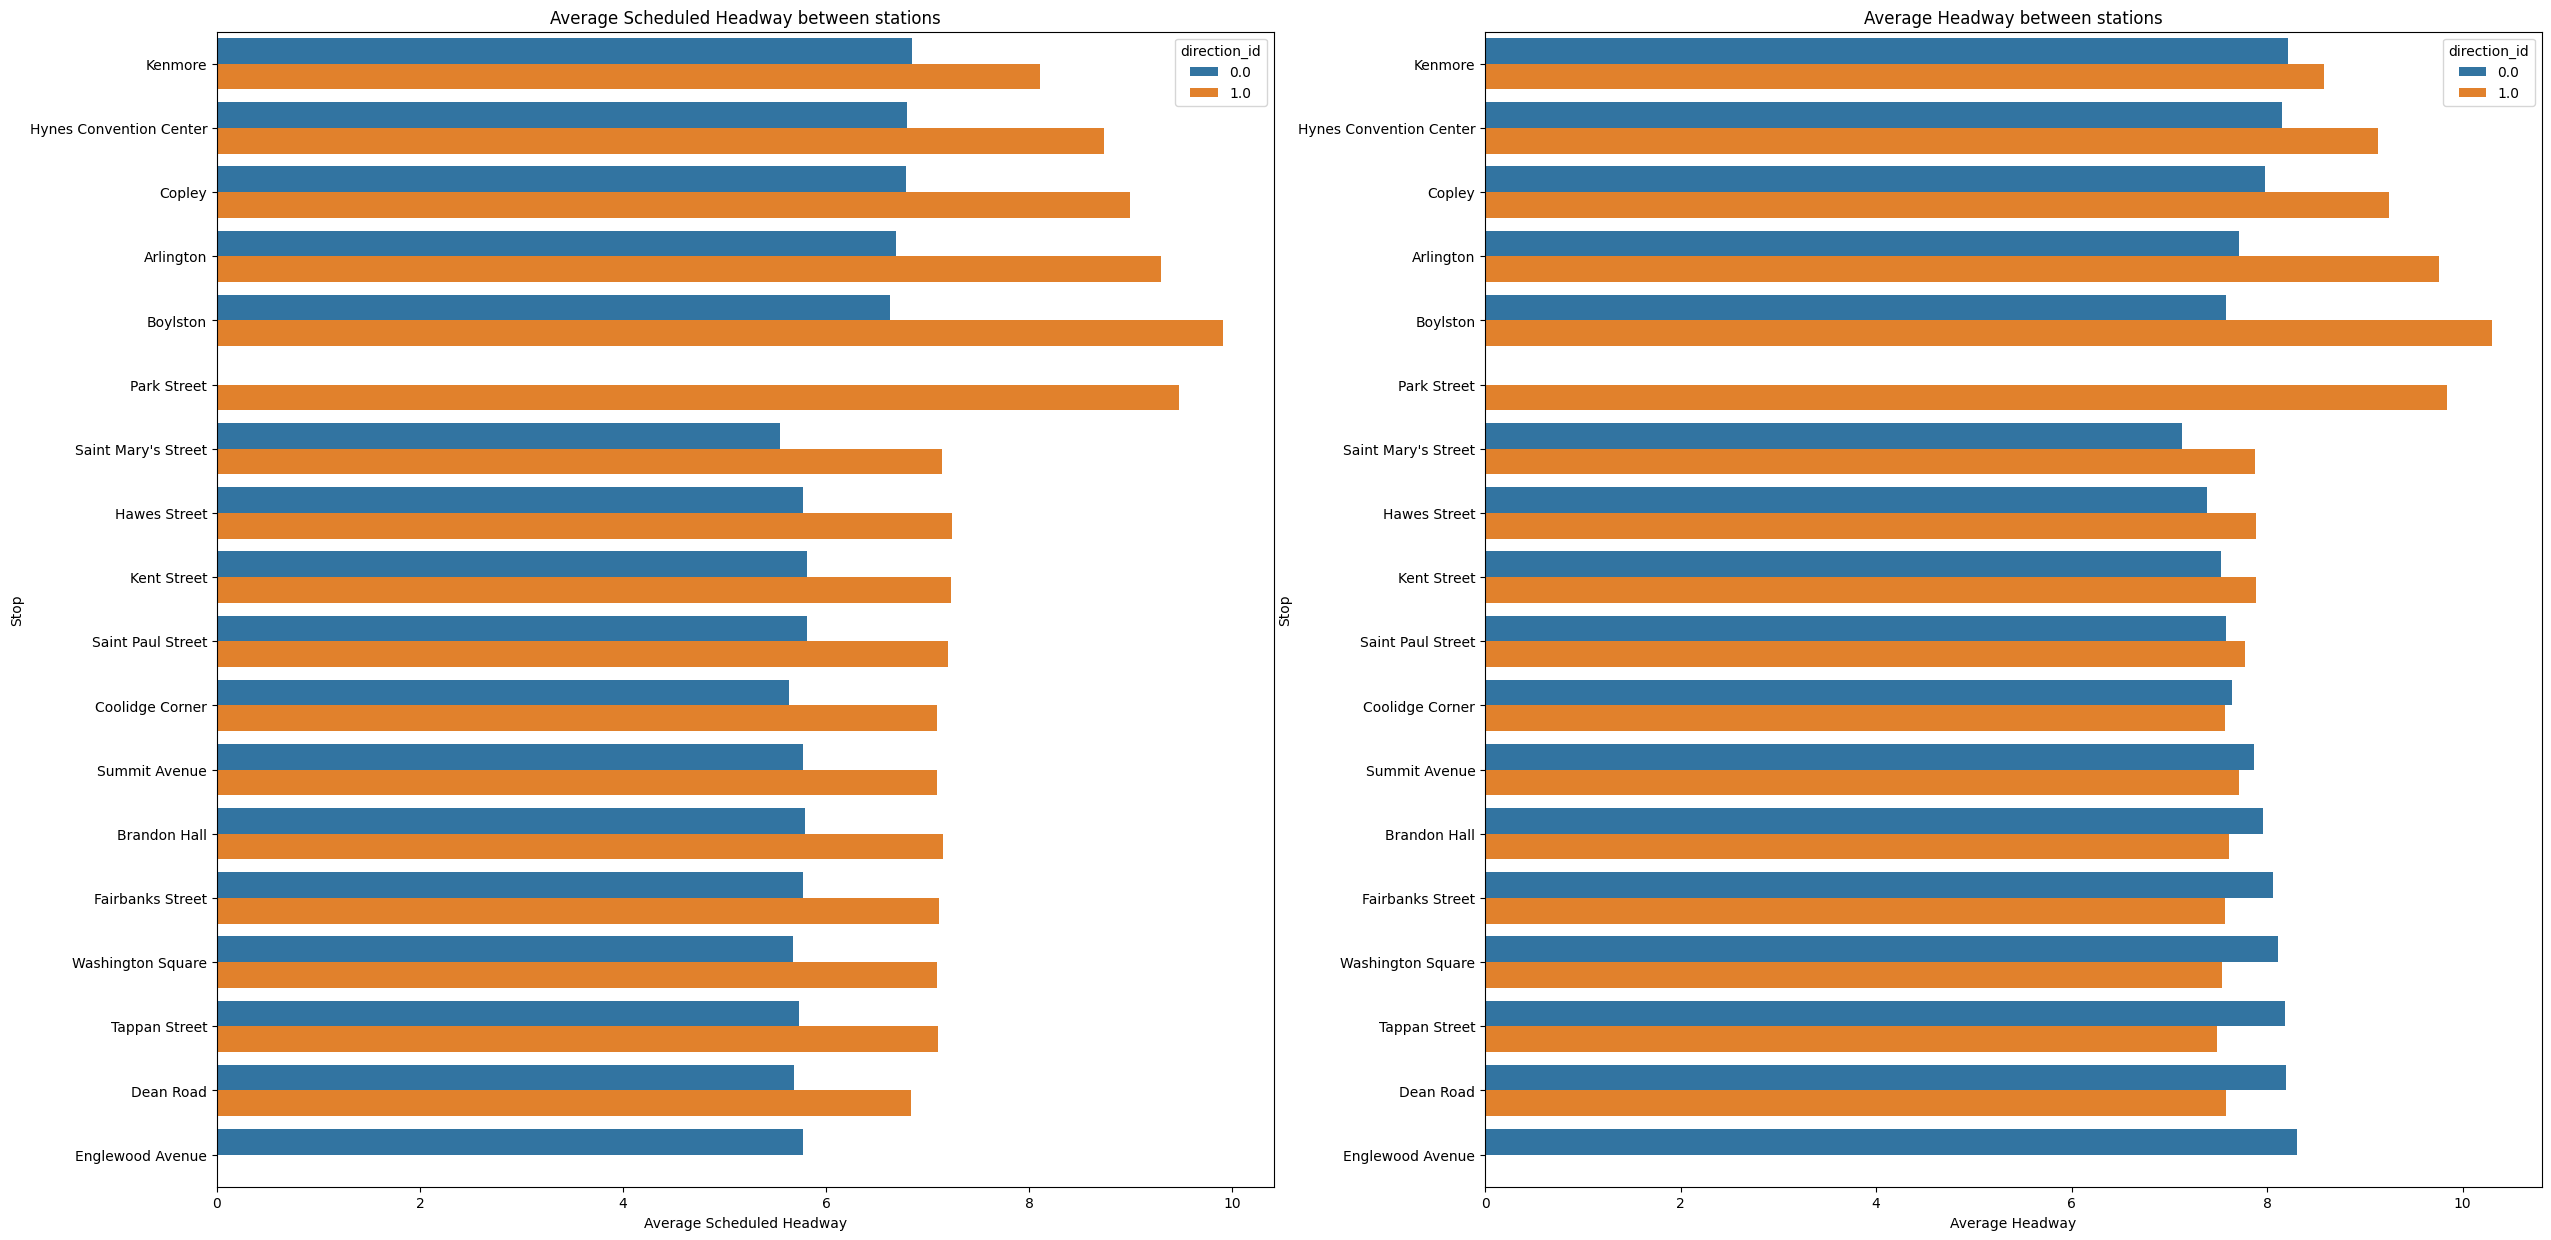

In [53]:
fig,axs = plt.subplots(ncols=2, figsize = (30,15))
sns.barplot(data = stop_times_green_c_out.sort_values(by = 'stop_id'),y = 'stop_name', x = 'sched_diff_std',hue = 'direction_id', orient = 'h', ax=axs[0])
sns.barplot(data = stop_times_green_c_out.sort_values(by = 'stop_id'),y = 'stop_name', x = 'actual_diff_std',hue = 'direction_id', orient = 'h', ax=axs[1])
axs[0].set_title('Average Scheduled Headway between stations')
axs[0].set_xlabel('Average Scheduled Headway')
axs[0].set_ylabel('Stop')
axs[1].set_title('Average Headway between stations')
axs[1].set_xlabel('Average Headway')
axs[1].set_ylabel('Stop')
